<a href="https://colab.research.google.com/github/heyrobin/Medical-Expenses--ML/blob/main/Medical_Charges_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Data

In [1]:
#Downloading the Data
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

#library
from urllib.request import urlretrieve

#import csv from url
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fae80a37350>)

In [2]:
#installing library for dataframe
import pandas as pd

#creating dataframe from csv
medical = pd.read_csv('medical.csv')

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#checking the dtypes and checking nulls
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking the numerical stats
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploritory Data Analysis

In [7]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


In [8]:
#themes
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
#checking distribution of age
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
fig_age = px.histogram(medical,
                x='age',
                nbins = 47,
                marginal='box',
                title = 'Distribution of Age')
fig_age.update_layout(bargap = 0.1)
fig_age.show()

In [11]:
#Observation : There is unusual spikes on the age of 18 and 19

In [12]:
fig_bmi = px.histogram(medical,
                       x='bmi',
                       marginal ='box',
                       nbins = 100,
                       title = 'Distribution of bmi',
                       color_discrete_sequence=['Red'])
fig_bmi.update_layout(bargap = 0.1)
fig_bmi.show()

In [13]:
fig_charges= px.histogram(medical,
                          x= 'charges',
                          marginal = 'box',
                          nbins=100,
                          color='smoker',
                          color_discrete_sequence=['grey', 'green'],
                          title = 'distribution of charges')
fig_charges.update_layout(bargap = 0.1)
fig_charges.show()

In [14]:
fig_charges_sex= px.histogram(medical,
                          x= 'charges',
                          marginal = 'box',
                          nbins=100,
                          color='sex',
                          color_discrete_sequence=['orange', 'green'],
                          title = 'distribution of charges with sex')
fig_charges_sex.update_layout(bargap = 0.1)
fig_charges_sex.show()

In [15]:
fig_charges_region= px.histogram(medical,
                          x= 'charges',
                          marginal = 'box',
                          nbins=100,
                          color='region',
                          color_discrete_sequence=['red', 'orange','yellow','green'],
                          title = 'Distribution of Charges with Region')
fig_charges_region.update_layout(bargap = 0.1)
fig_charges_region.show()

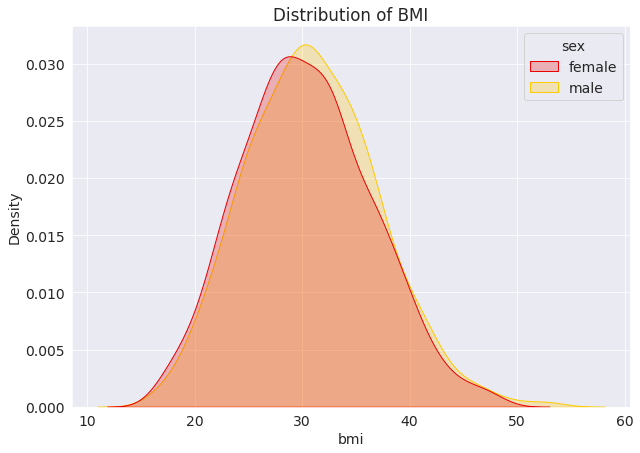

In [16]:
plt.figure(figsize=(10,7))
sns.kdeplot(data = medical , x="bmi", hue="sex", shade=True, palette="hot").set_title("Distribution of BMI")
plt.show()

**Smoker** :
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [17]:
medical.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
px.histogram(medical,
             x='smoker',
             color='sex',
             title = 'Smoker by Sex')

In [19]:
children_smoker = px.histogram(medical,
             x = 'children',
             color = 'smoker',
             title = 'Smoker having children')
children_smoker.update_layout( bargap = 0.1)

**Having** looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [20]:
fig = px.scatter(medical,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'], 
                 title = 'Age vs. Charges')
fig.show()

We can make the follwing observations from the above charts:

* the general trend seems to be the medical charges increases with the age, as observation. However there is a significant variation at every age, and age alone cannot be used to accurately determine medical charges.

* we can see there are three clusters which seems to form a line with a increasing slope.


1.   The primary and the largest cluster is the "Non smokers" charges increases with the age have the low medical charges compared to other clusters
2.   The second cluster consists of non smokers and non smokers. with the smokers with the health issues and non smokers without major health issues.
3.   The third cluster consist "Smokers" with major health issues have the highest medical charges.
4.   The none of the "non smokers" lies inside the third cluster shows the heavy smokers seems to pay higher medical charges than the non smokers and light smokers.



###BMI and Charges


In [21]:
fig = px.scatter(medical,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 title='BMI vs. Charges')
fig.show()

 charges are significantly higher for smokers with bmi of 30 or above 

In [22]:
fig  = px.violin(medical,
          x= 'children',
          y= 'charges',
          title = 'Charges Vs. Children', box=True,color = "sex"
          )


fig.show()

observation : People with less children seems to have higher charges but median are close to each other

In [23]:
fig = px.violin(medical,
          x= 'sex',
          y= 'charges',
          title = 'Charges Vs. Sex', box=True,color_discrete_sequence=['orange']
          )

fig.show()


In [24]:
    fig = px.violin(medical,
          x= 'smoker',
          y= 'charges',
          title = 'Charges Vs. Smoker', box=True,color_discrete_sequence=['grey']
          )

fig.show()

The smokers have the higher median of 35.4 and the charges are higher than the charges of "non-smoker" with median of 7.34

# Correlation
* Correlation of numerical values (bmi,age,charges and children)


In [25]:
medical.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


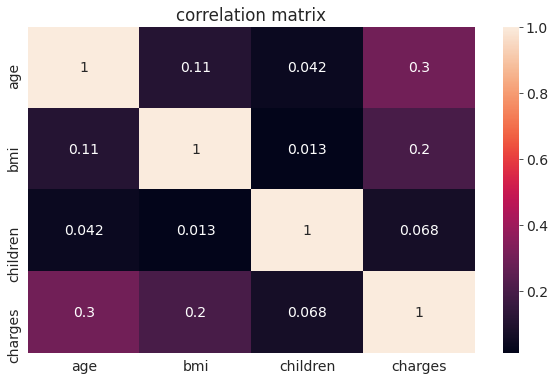

In [26]:

sns.heatmap(medical.corr(), annot=True)
plt.title('correlation matrix');


* Correlation of the categorical values(sex,smoker and region)

- convert the categorical values to numerical values

In [27]:
smoker_values = {"no":0, 'yes' :1}
smoker_num = medical.smoker.map(smoker_values)
medical.charges.corr(smoker_num)

0.787251430498478

In [28]:
sex_values = {"male":1,"female": 0 }
sex_num = medical.sex.map(sex_values)
medical.charges.corr(sex_num)

0.057292062202025484

# Data Processing

In [29]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 all the columns seems to be of right data type

# encoding

In [31]:
cat_cols = medical.select_dtypes(include="object").columns
num_cols = medical.select_dtypes(exclude="object").columns
print(cat_cols,num_cols)

Index(['sex', 'smoker', 'region'], dtype='object') Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe_data = ohe.fit_transform(medical[cat_cols]).toarray() #transforming cat cols to ohe
ohe_cols = ohe.get_feature_names(cat_cols) #extracting column names

ohe_medical = pd.DataFrame(data =ohe_data, columns=ohe_cols) #creating dataframe

medical = medical.join(ohe_medical) #joining the new dataframe with orignal dataframe

In [33]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [34]:
medical.drop(cat_cols, axis=1, inplace=True)
medical.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Model

In [35]:
X = medical.drop("charges", axis=1)
y= medical["charges"]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
from sklearn import metrics

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test,lr_predict))
lr_score = round(r2_score(y_test,lr_predict),2)*100

print("RMSE :",lr_rmse)
print("Accuracy :",lr_score,"%")
print("------->")
print("Intercept :",lr.intercept_)
print("Coeff :",lr.coef_)

RMSE : 5796.284659276273
Accuracy : 78.0 %
------->
Intercept : -574.5357125102018
Coeff : [ 2.56975706e+02  3.37092552e+02  4.25278784e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]


## Gradient Boosting Regressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

gbr_predict = gbr.predict(X_test)

gbr_rmse = np.sqrt(mean_squared_error(y_test,gbr_predict))
gbr_score = round(r2_score(y_test,gbr_predict),2)*100

print("RMSE :",gbr_rmse)
print("Accuracy :",gbr_score,"%")
print("------->")
print("Intercept :",lr.intercept_)
print("Coeff :",lr.coef_)

RMSE : 4325.637856438461
Accuracy : 88.0 %
------->
Intercept : -574.5357125102018
Coeff : [ 2.56975706e+02  3.37092552e+02  4.25278784e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]
